# Preprocessing of the data

In [1]:
# Load packages
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pickle

from FDApy.representation.functional_data import DenseFunctionalData
from FDApy.misc.loader import read_csv
from FDApy.visualization.plot import plot

matplotlib.use("pgf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

In [2]:
# Load data
temperature = read_csv('./data/canadian_temperature_daily.csv', index_col=0)
temperature = DenseFunctionalData({'input_dim_0': np.linspace(0, 1, num=365)}, temperature.values)

precipitation = read_csv('./data/canadian_precipitation_daily.csv', index_col=0)
precipitation = DenseFunctionalData({'input_dim_0': np.linspace(0, 1, num=364)}, precipitation.values)

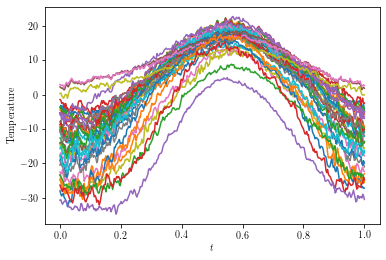

In [4]:
_ = plot(temperature)
_ = plt.xlabel('$t$')
_ = plt.ylabel('Temperature')
plt.savefig('./figures/temperature.pdf')

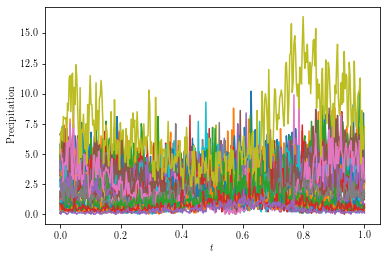

In [5]:
_ = plot(precipitation)
_ = plt.xlabel('$t$')
_ = plt.ylabel('Precipitation')
plt.savefig('./figures/precipitation.pdf')

We normalize the data following the methodology using by Jacques and Preda, in Model-based clustering for multivariate functional data (2012), section 2.3.

In [3]:
# Data reduction
cov_temp = temperature.covariance()
reduced_temp = DenseFunctionalData(temperature.argvals,
                                   temperature.values / np.sqrt(np.diag(cov_temp.values[0])))

cov_precipitation = precipitation.covariance()
reduced_prec = DenseFunctionalData(precipitation.argvals,
                                   precipitation.values / np.sqrt(np.diag(cov_precipitation.values[0])))

In [4]:
# Save the reduced data
with open('./data/canadian_temperature_daily_reduced.pkl', 'wb') as f:
    pickle.dump(reduced_temp, f)
with open('./data/canadian_precipitation_daily_reduced.pkl', 'wb') as f:
    pickle.dump(reduced_prec, f)

In [5]:
# Save as CSV for R methods
np.savetxt('./data/canadian_temperature_daily_reduced.csv', reduced_temp.values, delimiter=',')
np.savetxt('./data/canadian_precipitation_daily_reduced.csv', reduced_prec.values, delimiter=',')